# Investigate Boston Airbnb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

### Dataset Description 

#Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston

### project Motivation

#this project Aims to apply CRISP-DM on this dataset to try to answer the below proposed questions 

### Question(s) for Analysis

#what are the average price for neighborhoods in Boston?
#will better review scores affect the price?
#what are the most expensive property types?
#which neighborhood has better reviews scores?
#what the most property is listed in Airbnb dataset?
 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv('listings.csv')
df.shape

(3585, 95)

In [3]:
#listing all columns
pd.options.display.max_columns = 100
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
df.columns[df.nunique()<=1]

Index(['scrape_id', 'last_scraped', 'experiences_offered',
       'neighbourhood_group_cleansed', 'state', 'country_code', 'country',
       'has_availability', 'calendar_last_scraped', 'requires_license',
       'license', 'jurisdiction_names'],
      dtype='object')

In [6]:
df.columns[df.isnull().mean()>0.9]

Index(['neighbourhood_group_cleansed', 'square_feet', 'has_availability',
       'license', 'jurisdiction_names'],
      dtype='object')

In [7]:
df_subset = df.drop(['scrape_id', 'last_scraped', 'experiences_offered',
       'neighbourhood_group_cleansed', 'state', 'country_code', 'country',
       'has_availability', 'calendar_last_scraped', 'requires_license',
       'license', 'jurisdiction_names','square_feet'],axis=1)

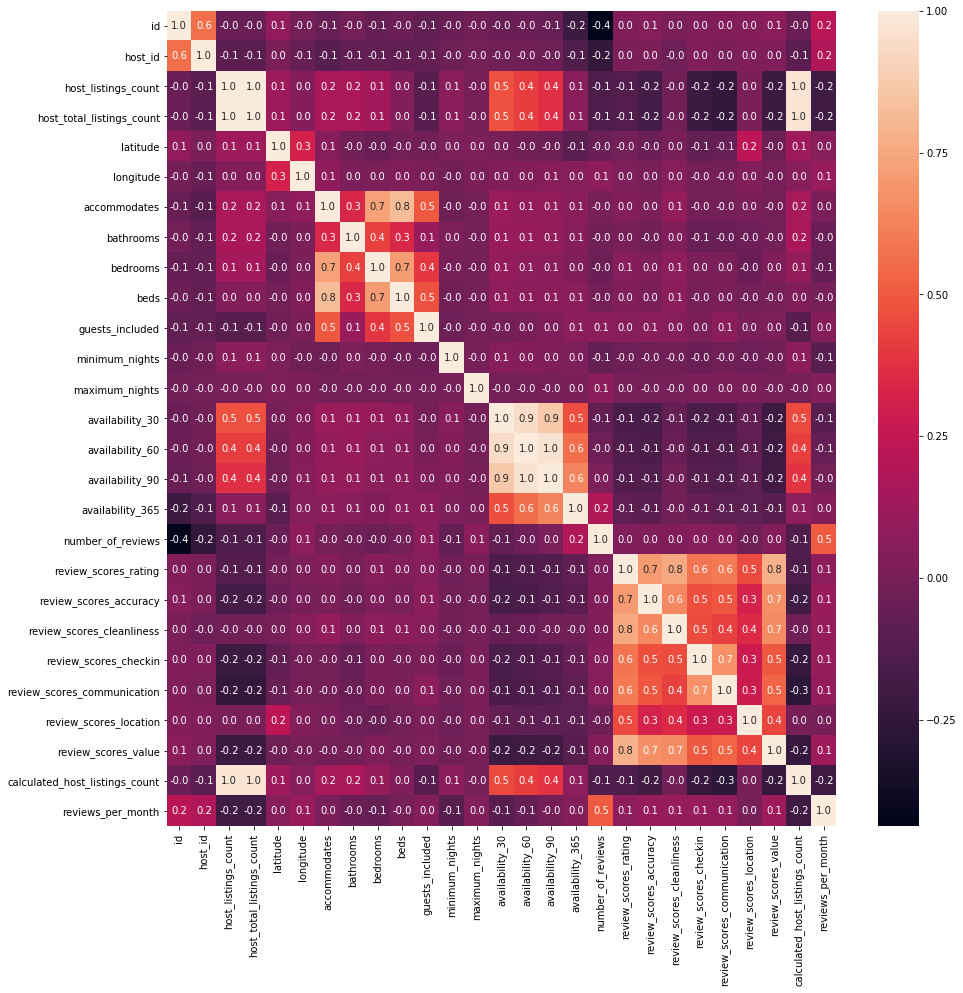

In [8]:
#heat map for dataset
plt.subplots(figsize=(15,15)) 
sns.heatmap(df_subset.corr(), annot=True, fmt='.1f');

In [9]:
df[['review_scores_rating','number_of_reviews']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
review_scores_rating    2772 non-null float64
number_of_reviews       3585 non-null int64
dtypes: float64(1), int64(1)
memory usage: 56.1 KB


In [10]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [11]:
df.nunique()

id                                  3585
listing_url                         3585
scrape_id                              1
last_scraped                           1
name                                3504
summary                             3113
space                               2268
description                         3423
experiences_offered                    1
neighborhood_overview               1728
notes                               1269
transit                             1859
access                              1762
interaction                         1617
house_rules                         1928
thumbnail_url                       2986
medium_url                          2986
picture_url                         3585
xl_picture_url                      2986
host_id                             2181
host_url                            2181
host_name                           1334
host_since                          1281
host_location                        176
host_about      

##### Based on unique Values , inspection and exploration of data and correlation between columns and missing values i decided to remove below columns for simplicity (some columns with complete values but won't add info to our analysis like "host name, urls, summary, space other columns have unique value and won't add any also to our analysis)

In [12]:

df_new=df.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url','host_acceptance_rate', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name','host_location',
       'host_about','host_location','host_about', 'host_neighbourhood', 'host_listings_count', 'host_verifications','street',
       'neighbourhood','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude','is_location_exact','square_feet','weekly_price', 'monthly_price','security_deposit',
        'cleaning_fee', 'extra_people', 'minimum_nights','maximum_nights','has_availability','availability_60', 'availability_90',
    'availability_365', 'calendar_last_scraped','first_review', 'last_review', 'review_scores_rating','host_thumbnail_url','host_picture_url','calendar_updated',
       'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location','requires_license','license', 'jurisdiction_names', 'instant_bookable', 'require_guest_profile_picture','require_guest_phone_verification', 'calculated_host_listings_count'],axis=1)

In [13]:
df_new.shape

(3585, 24)

In [14]:
df_new.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,availability_30,number_of_reviews,review_scores_value,cancellation_policy,reviews_per_month
0,12147973,2015-04-15,NaN,NaN,f,1,t,f,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,1,0,0,NaN,moderate,NaN
1,3075044,2012-06-07,within an hour,100%,f,1,t,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,0,26,36,9.0,moderate,1.30
2,6976,2009-05-11,within a few hours,100%,t,1,t,t,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,1,19,41,10.0,moderate,0.47
3,1436513,2013-04-21,within a few hours,100%,f,1,t,f,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,2,6,1,10.0,moderate,1.00
4,7651065,2014-05-11,within an hour,100%,t,1,t,t,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,1,13,29,10.0,flexible,2.25


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 24 columns):
id                           3585 non-null int64
host_since                   3585 non-null object
host_response_time           3114 non-null object
host_response_rate           3114 non-null object
host_is_superhost            3585 non-null object
host_total_listings_count    3585 non-null int64
host_has_profile_pic         3585 non-null object
host_identity_verified       3585 non-null object
neighbourhood_cleansed       3585 non-null object
property_type                3582 non-null object
room_type                    3585 non-null object
accommodates                 3585 non-null int64
bathrooms                    3571 non-null float64
bedrooms                     3575 non-null float64
beds                         3576 non-null float64
bed_type                     3585 non-null object
amenities                    3585 non-null object
price                        3585 non-null 

In [16]:
df_new['host_response_time'].value_counts()

within an hour        1384
within a few hours    1218
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64

In [17]:
#reading calendar file data
df_cal = pd.read_csv('calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [18]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [19]:
df_cal.nunique()

listing_id    3585
date           365
available        2
price         1246
dtype: int64

In [20]:
df.host_is_superhost.unique()

array(['f', 't'], dtype=object)

## Data Wrangling

#change types of columns according to data stored in it
#remove from price column $ sign and comma and change it to float
#replace F & T with boolean charachters 
#remove % sign from host response rate column
#change host_since columns to date type

In [21]:
price_to_int = lambda x: x.replace('$', '').replace(',', '')
d = {'f': False, 't': True}
f = {"%":''}
string_to_bool = lambda x: x.replace('f', False).replace('t', True)
df_new['price'] = df_new['price'].apply(price_to_int).astype(float)
df_new['host_is_superhost']=df_new['host_is_superhost'].replace(d)
df_new['host_has_profile_pic']=df_new['host_has_profile_pic'].replace(d)
df_cal['available']=df_cal['available'].replace(d)
df_new['host_identity_verified']=df_new['host_identity_verified'].replace(d)
df_new['host_response_rate']=df_new['host_response_rate'].str.replace("%","").astype(float)
df_new['host_since'] = pd.to_datetime(df_new['host_since']).dt.date.astype('datetime64[ns]')

#filling Null fields with Mode or Mean values 
#review scores value column has many missing values accordingly i will use 2 dataset one without review score mssing values and other with rest columns normally as they don't have much missing values and we need to visualize bigger sample when using them

In [22]:
df_new['host_response_time'] = df_new['host_response_time'].fillna(df_new['host_response_time'].mode()[0])
df_new['property_type'] = df_new['property_type'].fillna(df_new['property_type'].mode()[0])

In [23]:
df_new['review_scores_value_1']= 1

In [24]:
df_new.loc[df_new['review_scores_value'].isnull()==True,'review_scores_value_1']=0

In [25]:
df_review = df_new[df_new['review_scores_value_1']==1]

In [26]:
mean = lambda x: x.fillna(x.mean())

df_new[['host_response_rate','review_scores_value','reviews_per_month','bathrooms','bedrooms','beds']] = df_new[['host_response_rate','review_scores_value','reviews_per_month','bathrooms','bedrooms','beds']].apply(mean)



##### drop missing price values from calendar list as we can't expect them.

In [27]:
df_cal = df_cal.dropna()
df_cal['price']=df_cal['price'].apply(price_to_int).astype(float)
df_cal['date']=pd.to_datetime(df_cal['date']).dt.date.astype('datetime64[ns]')

In [28]:
df_new.describe()

,id,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,availability_30,number_of_reviews,review_scores_value,reviews_per_month,review_scores_value_1
count,3.585000e+03,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000
mean,8.440875e+06,94.989082,58.902371,3.041283,1.221647,1.255944,1.609060,173.925802,1.429847,8.64993,19.044630,9.168234,1.970908,0.770990
std,4.500787e+06,11.666205,171.119663,1.778929,0.500507,0.752008,1.010473,148.331321,1.056787,10.43533,35.571658,0.887785,1.883678,0.420254
min,3.353000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.00000,0.000000,2.000000,0.010000,0.000000
25%,4.679319e+06,94.989082,1.000000,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,0.00000,1.000000,9.000000,0.640000,1.000000
50%,8.577620e+06,100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,150.000000,1.000000,4.00000,5.000000,9.168234,1.910000,1.000000
75%,1.278953e+07,100.000000,7.000000,4.000000,1.000000,2.000000,2.000000,220.000000,1.000000,15.00000,21.000000,10.000000,2.130000,1.000000
max,1.493346e+07,100.000000,749.000000,16.000000,6.000000,5.000000,16.000000,4000.000000,14.000000,30.00000,404.000000,10.000000,19.150000,1.000000


In [29]:
df_new.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,availability_30,number_of_reviews,review_scores_value,cancellation_policy,reviews_per_month,review_scores_value_1
0,12147973,2015-04-15,within an hour,94.989082,False,1,True,False,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,1,0,0,9.168234,moderate,1.970908,0
1,3075044,2012-06-07,within an hour,100.000000,False,1,True,True,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,0,26,36,9.000000,moderate,1.300000,1
2,6976,2009-05-11,within a few hours,100.000000,True,1,True,True,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,1,19,41,10.000000,moderate,0.470000,1
3,1436513,2013-04-21,within a few hours,100.000000,False,1,True,False,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",75.0,2,6,1,10.000000,moderate,1.000000,1
4,7651065,2014-05-11,within an hour,100.000000,True,1,True,True,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",79.0,1,13,29,10.000000,flexible,2.250000,1


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 25 columns):
id                           3585 non-null int64
host_since                   3585 non-null datetime64[ns]
host_response_time           3585 non-null object
host_response_rate           3585 non-null float64
host_is_superhost            3585 non-null bool
host_total_listings_count    3585 non-null int64
host_has_profile_pic         3585 non-null bool
host_identity_verified       3585 non-null bool
neighbourhood_cleansed       3585 non-null object
property_type                3585 non-null object
room_type                    3585 non-null object
accommodates                 3585 non-null int64
bathrooms                    3585 non-null float64
bedrooms                     3585 non-null float64
beds                         3585 non-null float64
bed_type                     3585 non-null object
amenities                    3585 non-null object
price                        3585 non-nu

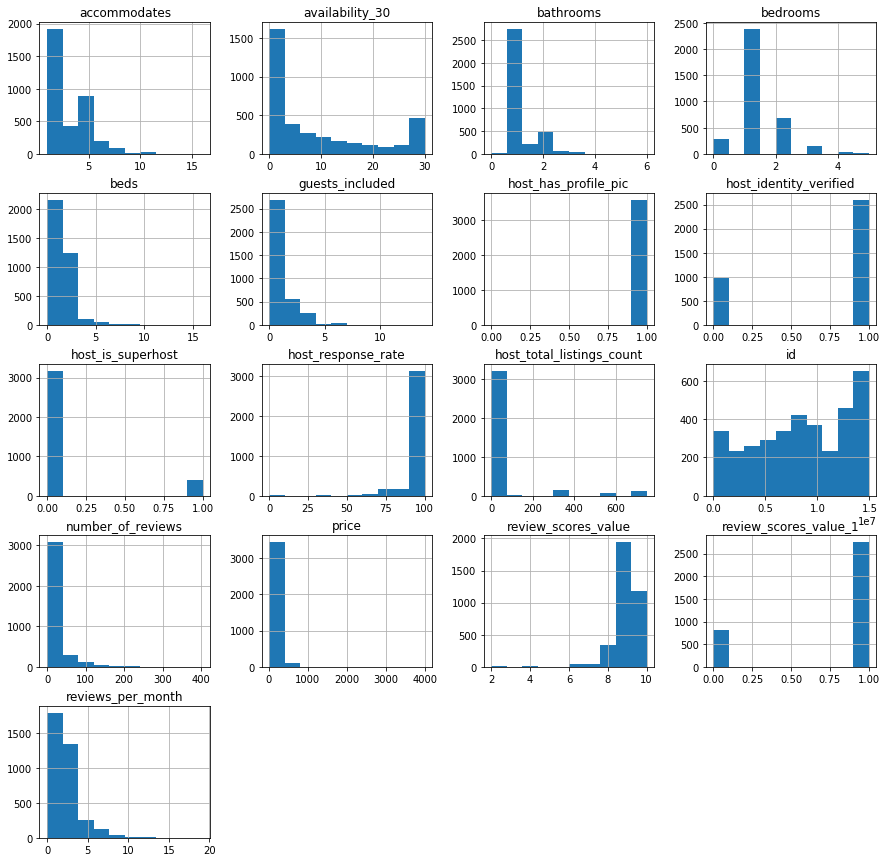

In [31]:
df_new.hist(figsize=(15,15));

## Exploratory Data Analysis 

#checking Price VS Room scores "using data without mean of scores"

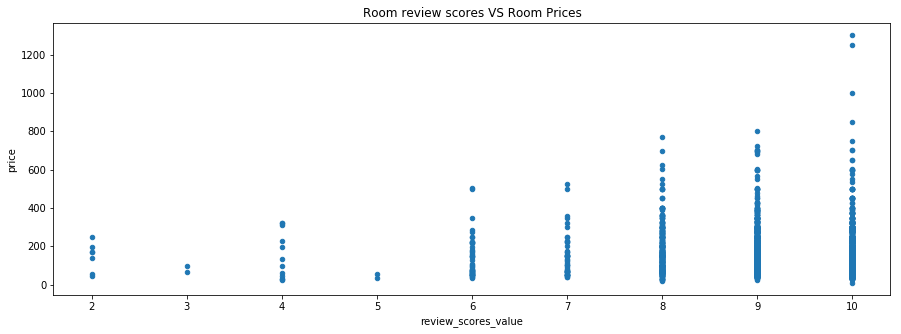

In [32]:
df_review.plot.scatter(x='review_scores_value',y='price',figsize=(15,5));
plt.title("Room review scores VS Room Prices");

#### it seems that price incease with review score

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 25 columns):
id                           3585 non-null int64
host_since                   3585 non-null datetime64[ns]
host_response_time           3585 non-null object
host_response_rate           3585 non-null float64
host_is_superhost            3585 non-null bool
host_total_listings_count    3585 non-null int64
host_has_profile_pic         3585 non-null bool
host_identity_verified       3585 non-null bool
neighbourhood_cleansed       3585 non-null object
property_type                3585 non-null object
room_type                    3585 non-null object
accommodates                 3585 non-null int64
bathrooms                    3585 non-null float64
bedrooms                     3585 non-null float64
beds                         3585 non-null float64
bed_type                     3585 non-null object
amenities                    3585 non-null object
price                        3585 non-nu

In [34]:
df_new.groupby('host_is_superhost')['price'].mean()

host_is_superhost
False    173.604468
True     176.434889
Name: price, dtype: float64

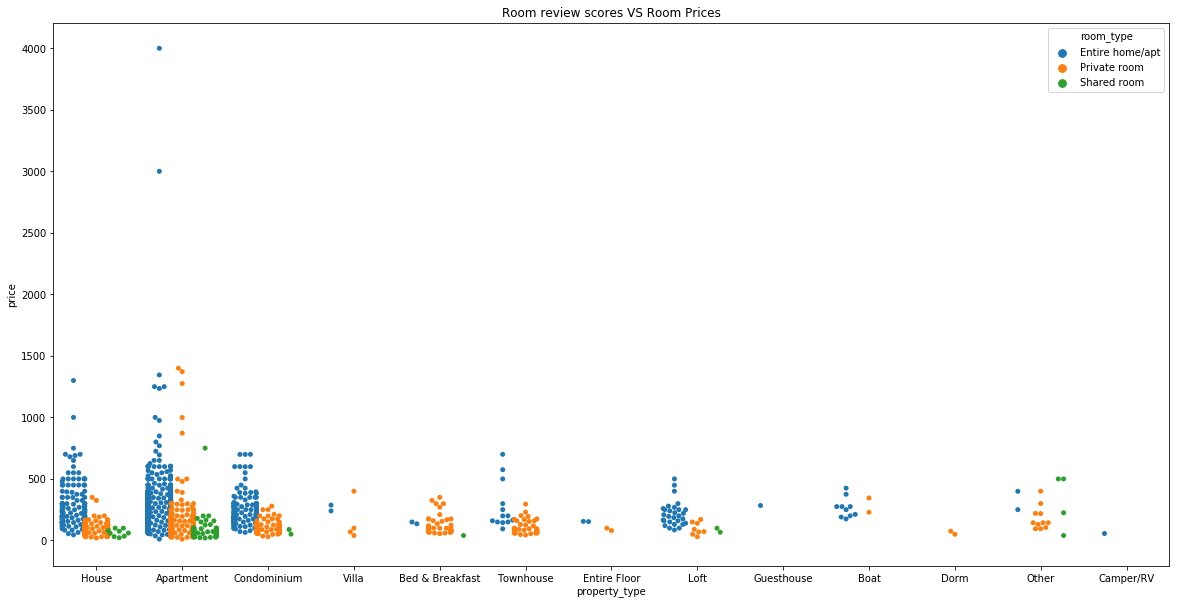

In [35]:
#plt.scatter(df_review['review_scores_value'],df_review['price'],df_review['neighbourhood_cleansed'],figsize=(15,5));

#sns.set_theme(style="ticks", color_codes=True)
plt.figure(figsize=(20,10));
sns.swarmplot(x='property_type', y='price', hue='room_type',data=df_new,dodge=True);
plt.title("Room review scores VS Room Prices");

#this data set targeting mainly appartments and houses then private rooms comes 2nd place
#price inceases off course as room type changes 

In [36]:
def plottt(df,col1,col2,kind,title,ylabel):
    '''
    input 
    df: dataframe
    col1: 1st column
    col2: 2nd column
    kind: type of plot
    title: title of plot
    ylabel: label of y axis
    
    output:
    graph of both columns using king of graph needed by user
    
    '''
    df.groupby(col1)[col2].mean().sort_values().plot(kind=kind,figsize=(15,5),color='blue');
    plt.title(title);
    plt.ylabel(ylabel);

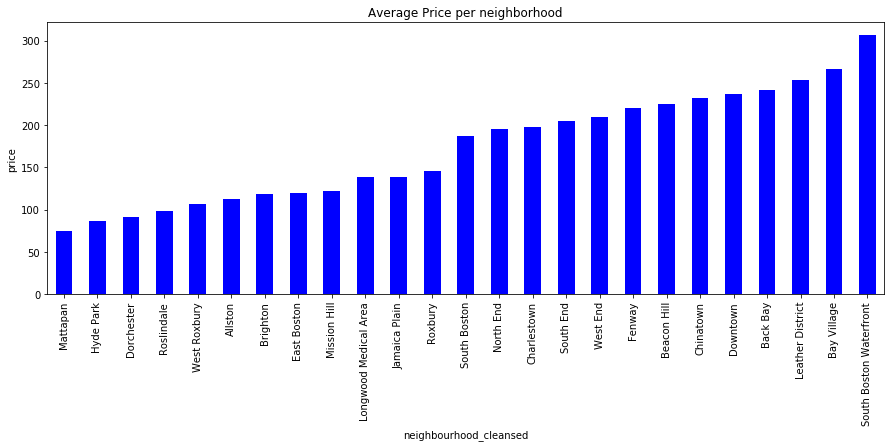

In [37]:
plottt(df_new,'neighbourhood_cleansed','price','bar',"Average Price per neighborhood","price")

#### plotting price with neighborhood showing that most expensive neighborhood is "south boston waterfront" then bay village and leather district 

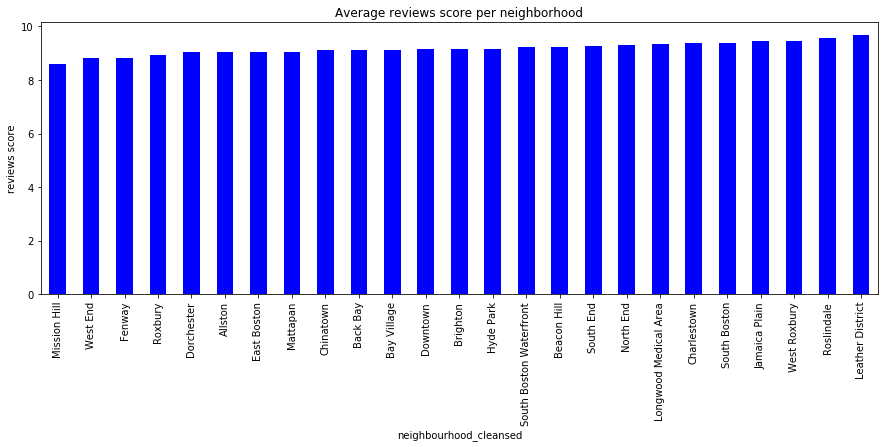

In [38]:
plottt(df_review,'neighbourhood_cleansed','review_scores_value','bar',"Average reviews score per neighborhood","reviews score")

#### plotting review scores with neighborhood showing that best scores per neighborhood is "leather district " then Rosilindale and west roxbury
#### Rosilindale neighborhood is one of the best reviews and cheap price one so its good as value for money

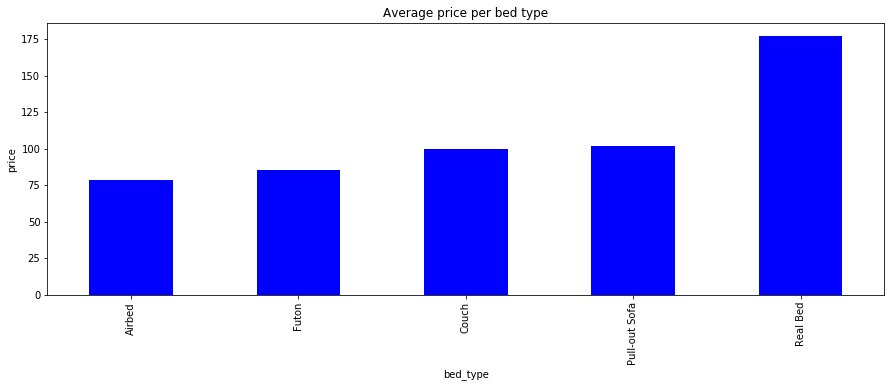

In [39]:
plottt(df_new,'bed_type','price','bar',"Average price per bed type","price")

##### price for real bed rooms has higher price as expected than other types 

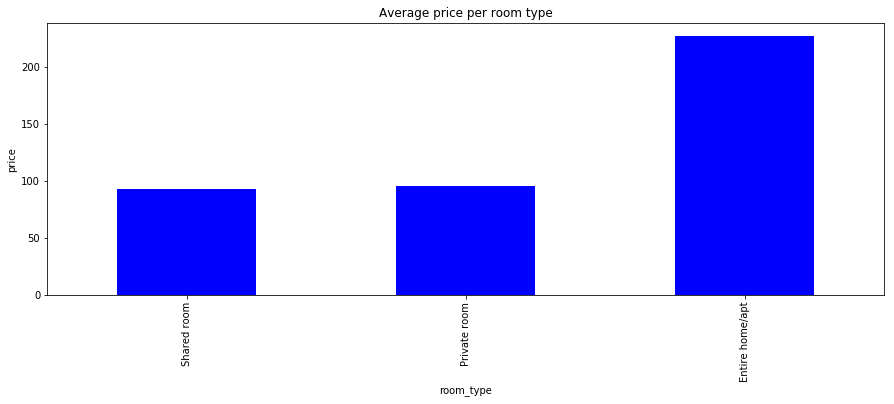

In [40]:
plottt(df_new,'room_type','price','bar',"Average price per room type","price")

In [47]:
df_new.groupby('room_type')['price'].count()/len(df_new)*100

room_type
Entire home/apt    59.330544
Private room       38.437936
Shared room         2.231520
Name: price, dtype: float64

##### price for Entire home has higher price as expected than other types 

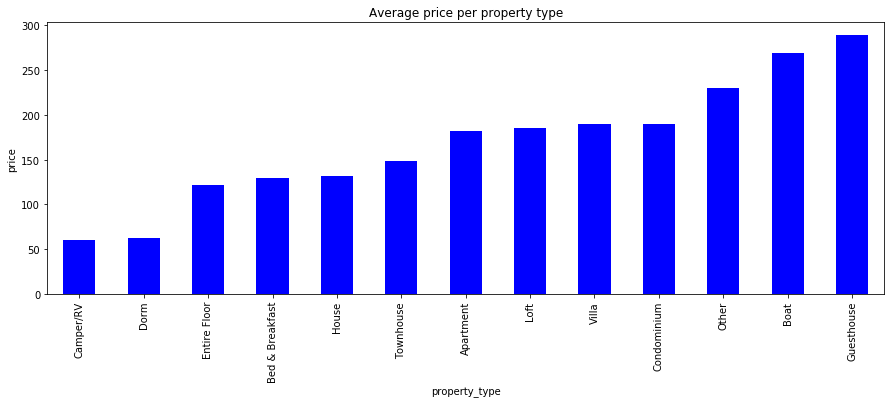

In [41]:
plottt(df_new,'property_type','price','bar',"Average price per property type","price")

##### price for Guest house found with the highest price 

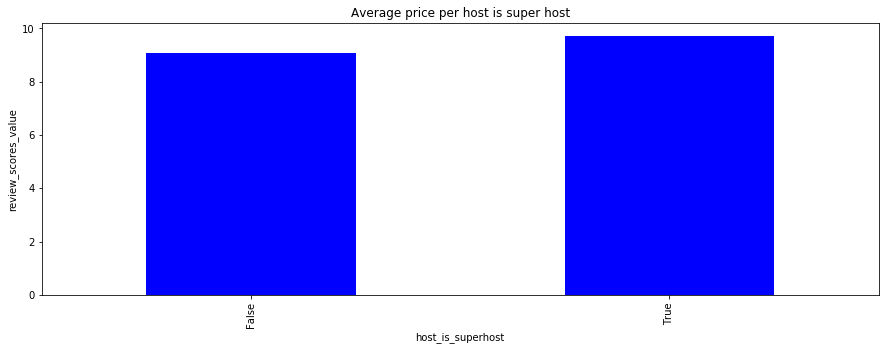

In [42]:
plottt(df_review,'host_is_superhost','review_scores_value','bar',"Average price per host is super host","review_scores_value")

##### hosts marked as superhost have higher review scores

In [43]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
listing_id    643037 non-null int64
date          643037 non-null datetime64[ns]
available     643037 non-null bool
price         643037 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 20.2 MB


In [44]:
df_cal['month_year'] = df_cal['date'].dt.to_period('M')

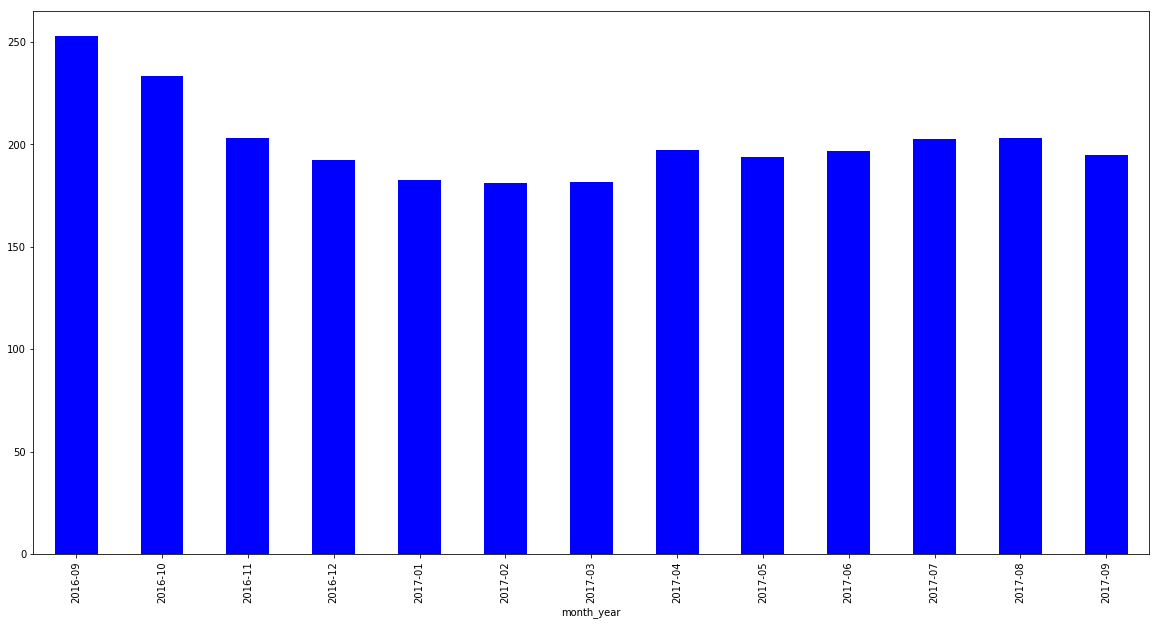

In [45]:
df_cal.groupby('month_year')['price'].mean().plot(kind='bar',color='blue',figsize=(20,10))

#### prices were higher in 2016 then become more stable and cheaper in 2017 however it seems that summer period have little higher prices that winter 

# conclusions / Insights

#### this data set targeting mainly appartments and houses 59% then private rooms comes 2nd place with 38%
#### price inceases off course as room type changes
#### plotting price with neighborhood showing that most expensive neighborhood is "south boston waterfront" then bay village and leather district 
#### plotting review scores with neighborhood showing that best scores per neighborhood is "leather district " then Rosilindale and west roxbury
#### Rosilindale neighborhood is one of the best reviews and cheap price one so its good as value for money
##### price for real bed rooms has higher price as expected than other types 
##### price for Entire home has higher price as expected than other types 
##### price for Guest house found with the highest price 
#### prices were higher in 2016 then become more stable and cheaper in 2017 however it seems that summer period have little higher prices that winter